In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/WineQT.csv
/kaggle/input/house-price/house price.csv
/kaggle/input/credit-card/creditcard.csv


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

In [3]:
credit= pd.read_csv('/kaggle/input/credit-card/creditcard.csv')
wine = pd.read_csv('/kaggle/input/wine-quality/WineQT.csv')
house= pd.read_csv('/kaggle/input/house-price/house price.csv')

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data doesn't contain any missing values 

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
import warnings 
warnings.filterwarnings('ignore')

In [9]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
scale_data = credit.drop(['Class'], axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in scale_data:
    credit[i] = scaler.fit_transform(credit[[i]])

In [11]:
from sklearn.model_selection import train_test_split
x = credit.drop(['Class', 'Time'], axis = 1)
y = credit['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [12]:
model = Sequential()
model.add(Dense(units = 128, input_dim = 29, activation = 'relu'))
model.add(Dense(units = 64, activation = 'tanh'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

model.fit(xtrain, ytrain , epochs = 50 , batch_size = 32, validation_data = (xtest,ytest))


ypred = np.round(model.predict(xtest))

accuracy = accuracy_score(ytest, ypred)

print(f'accuracy: {accuracy}')


Epoch 1/50
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 3/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 4/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 5/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 6/50
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/50
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0025 - val_ac

In [13]:
print(xtest.shape)
print(xtrain.shape)

(85443, 29)
(199364, 29)


In [14]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9993328885923949
Precision: 0.7801418439716312
Recall: 0.8088235294117647
F1 Score: 0.7942238267148015


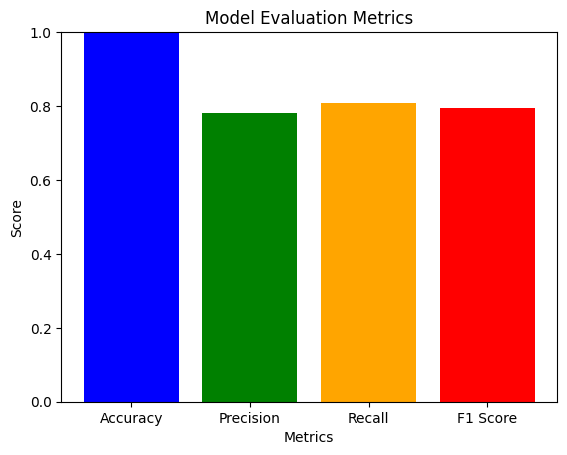

In [15]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for better visualization
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()